In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import scvelo as scv
import latentvelo as ltv
import pandas as pd
import seaborn as sns

Global seed set to 0


saving figure to file ../figures/linear_latentvelo_velocity.png


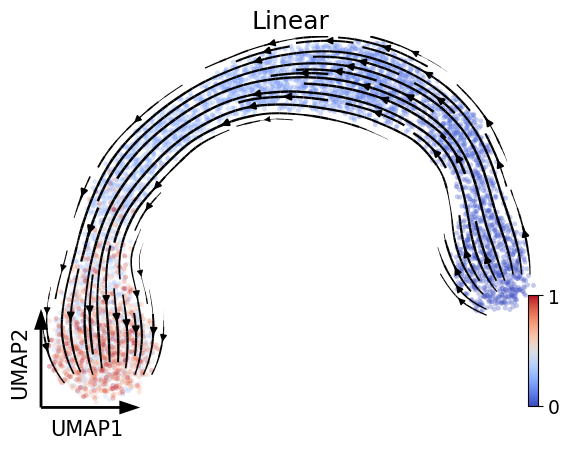

saving figure to file ../figures/bifurcation_latentvelo_velocity.png


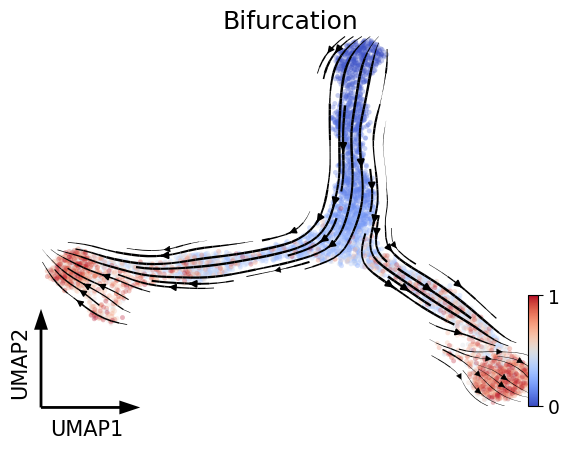

saving figure to file ../figures/trifurcation_latentvelo_velocity.png


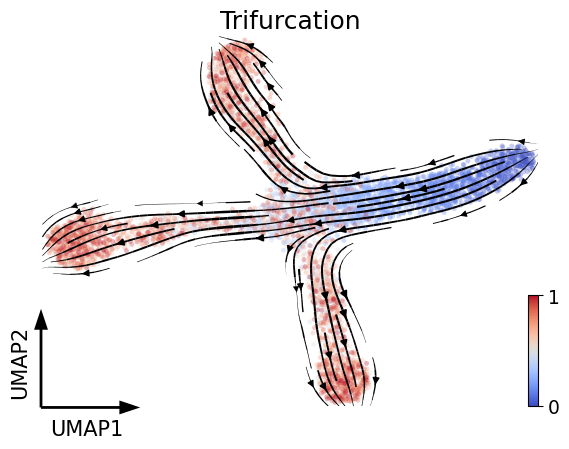

saving figure to file ../figures/binary_tree_latentvelo_velocity.png


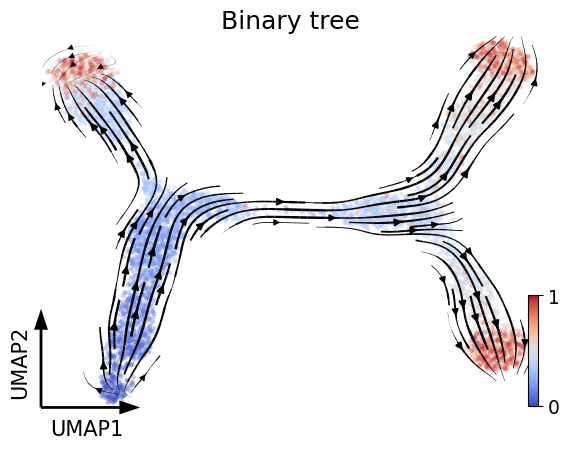

In [7]:
lin = sc.read('synthetic_trajectories/fits/linear_latent_adata.h5ad')
scv.pl.velocity_embedding_stream(lin, color='sim_time', title='Linear', fontsize=18, 
            frameon='artist', rescale_color=(0,1), color_map='coolwarm', size=50, vkey='spliced_velocity',
                                 save='../figures/linear_latentvelo_velocity.png')

bif = sc.read('synthetic_trajectories/fits/bifurcation_latent_adata.h5ad')
scv.pl.velocity_embedding_stream(bif, color='sim_time', title='Bifurcation', fontsize=18, 
            frameon='artist', rescale_color=(0,1), color_map='coolwarm', size=50, vkey='spliced_velocity',
                                 cutoff_perc=0, save='../figures/bifurcation_latentvelo_velocity.png')

trif = sc.read('synthetic_trajectories/fits/trifurcation_latent_adata.h5ad')
scv.pl.velocity_embedding_stream(trif, color='sim_time', title='Trifurcation', fontsize=18, 
            frameon='artist', rescale_color=(0,1), color_map='coolwarm', size=50, vkey='spliced_velocity',
                                cutoff_perc=0, save='../figures/trifurcation_latentvelo_velocity.png')

bintree = sc.read('synthetic_trajectories/fits/binary_tree_latent_adata.h5ad')
scv.pl.velocity_embedding_stream(bintree, color='sim_time', title='Binary tree', fontsize=18, 
            frameon='artist', rescale_color=(0,1), color_map='coolwarm', size=50, vkey='spliced_velocity',
                                 cutoff_perc=0, save='../figures/binary_tree_latentvelo_velocity.png')

In [3]:
model_lin = pd.read_csv('synthetic_trajectories/fits/linear_results_df.csv')
model_lin['Model'] = 'LatentVelo'
model_lin['dataset'] = 'Linear'

model_bif = pd.read_csv('synthetic_trajectories/fits/bifurcation_results_df.csv')
model_bif['Model'] = 'LatentVelo'
model_bif['dataset'] = 'Bifurcation'

model_trif = pd.read_csv('synthetic_trajectories/fits/trifurcation_results_df.csv')
model_trif['Model'] = 'LatentVelo'
model_trif['dataset'] = 'Trifurcation'

model_bintree = pd.read_csv('synthetic_trajectories/fits/binary_tree_results_df.csv')
model_bintree['Model'] = 'LatentVelo'
model_bintree['dataset'] = 'Binary tree'

In [4]:
dyn_bif = pd.read_csv('synthetic_trajectories/scvelo/fits/dyn_bifurcation_average.csv', index_col=0)
stoc_bif = pd.read_csv('synthetic_trajectories/scvelo/fits/stoc_bifurcation_average.csv', index_col=0)
dyn_bif['dataset'] = 'Bifurcation'
dyn_bif['Model'] = 'scVelo(dyn)'
stoc_bif['dataset'] = 'Bifurcation'
stoc_bif['Model'] = 'scVelo(stoc)'

In [5]:
dyn_lin = pd.read_csv('synthetic_trajectories/scvelo/fits/dyn_linear_average.csv', index_col=0)
stoc_lin = pd.read_csv('synthetic_trajectories/scvelo/fits/stoc_linear_average.csv', index_col=0)
dyn_lin['dataset'] = 'Linear'
dyn_lin['Model'] = 'scVelo(dyn)'
stoc_lin['dataset'] = 'Linear'
stoc_lin['Model'] = 'scVelo(stoc)'

In [6]:
dyn_trif = pd.read_csv('synthetic_trajectories/scvelo/fits/dyn_trifurcation_average.csv', index_col=0)
stoc_trif = pd.read_csv('synthetic_trajectories/scvelo/fits/stoc_trifurcation_average.csv', index_col=0)
dyn_trif['dataset'] = 'Trifurcation'
dyn_trif['Model'] = 'scVelo(dyn)'
stoc_trif['dataset'] = 'Trifurcation'
stoc_trif['Model'] = 'scVelo(stoc)'

In [7]:
dyn_bintree = pd.read_csv('synthetic_trajectories/scvelo/fits/dyn_binary_tree_average.csv', index_col=0)
stoc_bintree = pd.read_csv('synthetic_trajectories/scvelo/fits/stoc_binary_tree_average.csv', index_col=0)
dyn_bintree['dataset'] = 'Binary tree'
dyn_bintree['Model'] = 'scVelo(dyn)'
stoc_bintree['dataset'] = 'Binary tree'
stoc_bintree['Model'] = 'scVelo(stoc)'

In [8]:
results_small= pd.concat((model_lin, model_bif, model_trif, model_bintree, 
                    dyn_lin, dyn_bif, dyn_trif, dyn_bintree,
                    stoc_lin, stoc_bif, stoc_trif, stoc_bintree), axis=0)

In [9]:
def bar_plot(df, x, y, hue, ax, orient='v', palette ="Set1"):
    
    g = sns.barplot(
        data=df, 
        y=y, x=x, hue=hue,ax=ax,
        orient=orient, palette = palette
    )

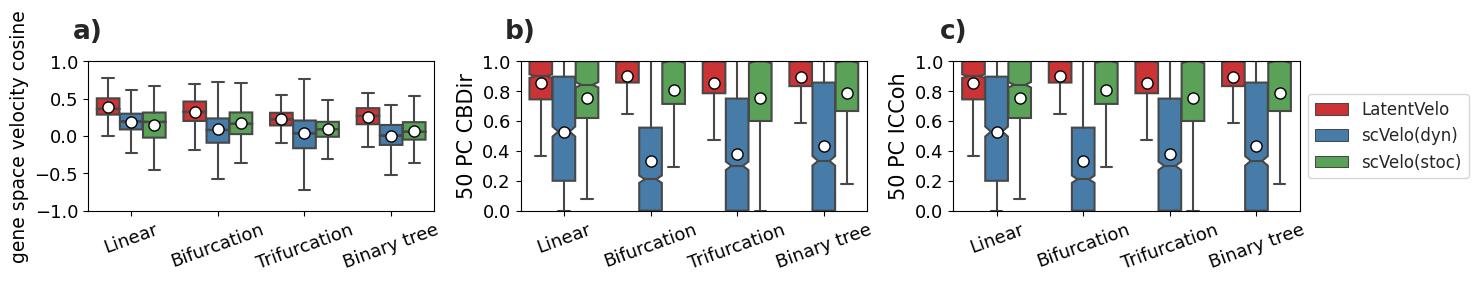

In [10]:
import seaborn as sns

fig, ax=plt.subplots(1,3, figsize=(15,3))
sns.set_style("ticks")
ax=ax.flatten()


ax[0].text(0.0, 1.2, 'a)', horizontalalignment='center', 
           verticalalignment='center', transform=ax[0].transAxes,
          fontweight='bold', fontsize=19)

ax[1].text(0.0, 1.2, 'b)', horizontalalignment='center', 
           verticalalignment='center', transform=ax[1].transAxes,
          fontweight='bold', fontsize=19)

ax[2].text(0.0, 1.2, 'c)', horizontalalignment='center', 
           verticalalignment='center', transform=ax[2].transAxes,
          fontweight='bold', fontsize=19)

ltv.pl.box_plot(results_small, x='dataset', y='velocity_cosine', hue='Model', ax=ax[0])
ltv.pl.box_plot(results_small, x='dataset', y='CBDir_pca', hue='Model', ax=ax[1])
ltv.pl.box_plot(results_small, x='dataset', y='ICCoh_pca', hue='Model', ax=ax[2])

for i in range(ax.shape[0]-1):
    ax[i].legend([],[], frameon=False)
ax[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
for i in range(ax.shape[0]):
    ax[i].set_xlabel('')
    plt.setp(ax[i].get_xticklabels(), fontsize=13, rotation=20)
    plt.setp(ax[i].get_yticklabels(), fontsize=13)

ax[0].set_ylim(-1,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)

ax[0].set_ylabel('gene space velocity cosine', fontsize=13.5)
ax[1].set_ylabel('50 PC CBDir', fontsize=15)
ax[2].set_ylabel('50 PC ICCoh', fontsize=15)


plt.tight_layout()
plt.savefig('figures/synthetic_benchmarks.pdf')
plt.show()